<a href="https://colab.research.google.com/github/kittimaxz/multivariate/blob/main/Chapter_5_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
BFI_data=pd.read_csv('bfi.csv')
BFI_data.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


**Factor Analysis**

***Assumptions :*** 

ในข้อมูล multivariate ที่มีตัวแปร obser variables จำนวน n ตัว 

มีตัวแปร Factors (Latent Variables) จำนวน k ตัวที่สามารถอธิบายข้อมูลทั้งหมดได้

โดย k < n 

***Assumption :***
  * There are no outliers in data.
  * Sample size should be greater than the factor.
  * There should not be ***perfact multicollinearity.***
  * There should not be ***homoskedasticity*** between the variables.

**การทำ Factor Analylsis**

In [3]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
###error เพราะไม่มีคำสั่ง  factor_analyzer ดังนั้นจะต้องทำการ install คำสั่ง  factor_analyzer ก่อนจึงจะสามารถใช้งานได้

ModuleNotFoundError: ignored

แก้ error ``` No module named 'factor_analyzer' ```โดย

วิธี install package อื่นๆ

In [4]:
!pip install factor-analyzer

     |████████████████████████████████| 40kB 3.0MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp37-none-any.whl size=40383 sha256=0582e7e2172b26ecae7e2397caab56dc8cb12ee7e3dea38c48404a7006ca3ec0
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [5]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt  ###=from matplotlib import pyplot as plt (มีค่าเท่ากัน)

Quiz 5 เลือกข้อมูลมาเฉพาะ a1,a2,a3,...,o3,o4,o5 ด้วยคำสั่ง iloc[]

In [7]:
BFI_data_dropped=BFI_data.iloc[:,1:26] ### ใช้เป็น [1,1:-3] ก็ได้โดยนับจากข้อมูลสุดท้ายเป็น -1,-2 เข้ามาเรื่อยๆ จนถึงข้อมูลที่เราต้องการ
BFI_data_dropped

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,1.0,4.0,5.0,5.0,6.0,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [8]:
BFI_data_dropped=BFI_data_dropped.dropna()

In [9]:
BFI_data_dropped.shape

(2436, 25)

**Bartter's test**

In [10]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value,p_value
### error เนื่องจากไม่มีชื่อ df ต้องเปลี่ยนชื่อตัวแปรให้เป็น df

NameError: ignored

In [11]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(BFI_data_dropped)
chi_square_value,p_value

(18170.966350869243, 0.0)

**Kaiser Meyer Olkin (KMO) test**

***ถ้าค่า KMO model มีค่ามากกว่า 0.6 แปลว่าข้อมูลเหมาะสมที่นำไปทำ Factor Analysis (ยิ่งมีค่าสูงยิ่งดี)***

In [12]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(BFI_data_dropped)
kmo_model

0.8485397221949221

**Factor Analysis**

***Import***

In [14]:
from factor_analyzer import FactorAnalyzer

***Define***

In [15]:
fa = FactorAnalyzer(n_factors=20)

***Fit-tranform***

In [16]:
data_fa=fa.fit_transform(BFI_data_dropped)

In [17]:
data_fa.shape

(2436, 20)

***วิธีตัดสินว่าเราจะลดเหลือกี่ Dimension (มี Factors ทั้งหมดกี่ตัว)***

In [18]:
ev,v=fa.get_eigenvalues()

**ใช้ eigen values**
***ถ้า eigen values มากกว่า 1 แสดงว่าเราใช้ vector นั้น***

In [19]:
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

**scree plot **

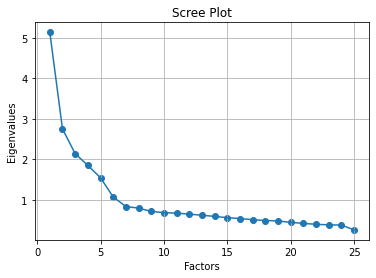

In [20]:
#Create scree plot using matholotlib
plt.scatter(range(1,BFI_data_dropped.shape[1]+1),ev)
plt.plot(range(1,BFI_data_dropped.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalues')
plt.grid()
plt.show()

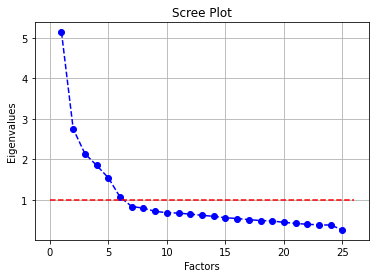

In [21]:
#Create scree plot using matholotlib
plt.plot(range(1,BFI_data_dropped.shape[1]+1),ev,'bo--')
plt.plot([0,BFI_data_dropped.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalues')
plt.grid()
plt.show()

In [22]:
data_fa[:,:6]

array([[-0.89749661, -0.12809666, -1.22649076,  1.08665889,  0.42476701,
         0.03981611],
       [ 0.33679356, -0.15018138, -0.04332274, -0.10339328,  0.29665648,
        -1.11019718],
       [-0.24521029,  0.80409961,  0.39343377, -0.30106518,  0.82703928,
        -0.2982022 ],
       ...,
       [ 0.38724631, -0.02183587,  1.19616826, -1.19357208,  0.79669501,
        -0.95295109],
       [-0.75695976,  0.94984758,  1.24363484, -1.15230215,  2.2534133 ,
        -1.0218667 ],
       [-2.35583952, -1.49829856,  0.49436981, -1.64734311,  0.94742323,
         0.43462495]])

***รัน Factor Analyzer อีกรอบ ด้วย Parameters จำนวน factors เท่ากับ 6***

In [25]:
from factor_analyzer import FactorAnalyzer
fa2 = FactorAnalyzer(n_factors=6)
data_fa = fa2.fit_transform(BFI_data_dropped)

In [26]:
fa2.loadings_.shape

(25, 6)

**plot factor loading**

In [29]:
from matplotlib import  pyplot as plt
import numpy as np
import matplotlib

**matrix plot**

***Confirmatery***

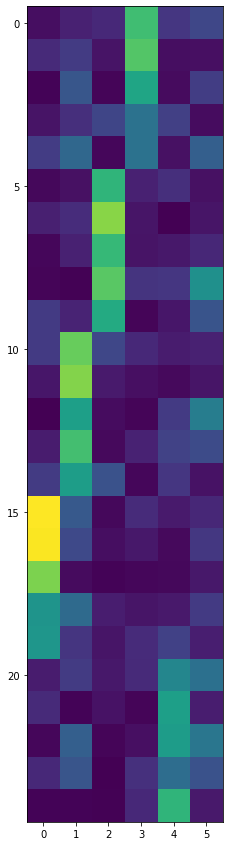

In [32]:
matplotlib.rcParams['figure.figsize']=[15,15]
plt.imshow(np.absolute(fa2.loadings_))

 การทำ Factor Analysis ให้มีประโยชน์หลัก 2 อันคือ

1. Confirmatery
2. Explolatory




***กราฟแท่ง***

<BarContainer object of 25 artists>

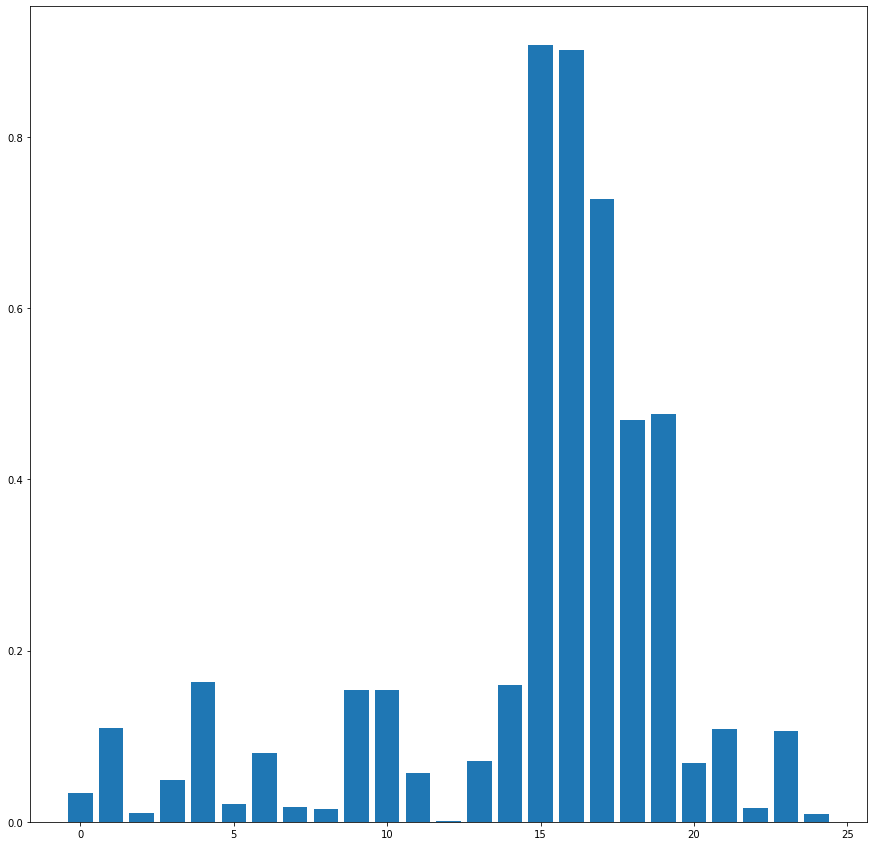

In [34]:
plt.bar(range(25),np.absolute(fa2.loadings_[:,0])) ### ใช้คำสั่ง  np.absolute เนื่องจากจากการดูค่า เราจะไม่ดูที่เครื่องหมาย

**EXSAM 03** 

***ทำ FactorAnalysis ข้อมูล Fifa 2018***